<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,740.381494,979.867925,275.573965,704.293960
1,0.0,1.0,41.321385,70.807138,64.285975,-639.404796,-452.990298,183.824076,-636.814374
2,0.0,2.0,97.569298,71.702146,80.680950,310.923701,570.876096,334.852670,236.023426
3,0.0,3.0,95.847263,60.930988,21.264605,341.123846,529.166702,224.172644,304.994057
4,0.0,4.0,36.355496,24.921419,84.847584,-47.402208,108.722291,146.432498,-37.710207
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-364.877424,-140.835989,192.874164,-333.710153
249996,999.0,246.0,35.459513,28.969407,64.695515,49.702867,188.827302,115.894859,72.932442
249997,999.0,247.0,60.281445,89.820202,64.100453,-66.762920,157.439180,196.707365,-39.268185
249998,999.0,248.0,29.142842,36.286090,55.851661,-208.125899,-76.845306,96.749113,-173.594419


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    56.430038  74.617667  98.438727   740.381494   979.867925   
      1.0    41.321385  70.807138  64.285975  -639.404796  -452.990298   
      2.0    97.569298  71.702146  80.680950   310.923701   570.876096   
      3.0    95.847263  60.930988  21.264605   341.123846   529.166702   
      4.0    36.355496  24.921419  84.847584   -47.402208   108.722291   
...                ...        ...        ...          ...          ...   
999.0 245.0  96.120114  89.727149  28.194171  -364.877424  -140.835989   
      246.0  35.459513  28.969407  64.695515    49.702867   188.827302   
      247.0  60.281445  89.820202  64.100453   -66.762920   157.439180   
      248.0  29.142842  36.286090  55.851661  -208.125899   -76.845306   
      249.0  30.233196  79.460010  26.722420 -1156.661886 -1010.246260   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    275.573965   704.293960  
      1.0    183.824076  -636.814374  
      2.0    334.852670   236.023426  
      3.0    224.172644   304.994057  
      4.0    146.432498   -37.710207  
...                 ...          ...  
999.0 245.0  192.874164  -333.710153  
      246.0  115.894859    72.932442  
      247.0  196.707365   -39.268185  
      248.0   96.749113  -173.594419  
      249.0   81.170067 -1091.416328  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    56.430038  74.617667  98.438727   740.381494   979.867925   
      1.0    41.321385  70.807138  64.285975  -639.404796  -452.990298   
      2.0    97.569298  71.702146  80.680950   310.923701   570.876096   
      3.0    95.847263  60.930988  21.264605   341.123846   529.166702   
      4.0    36.355496  24.921419  84.847584   -47.402208   108.722291   
...                ...        ...        ...          ...          ...   
999.0 245.0  96.120114  89.727149  28.194171  -364.877424  -140.835989   
      246.0  35.459513  28.969407  64.695515    49.702867   188.827302   
      247.0  60.281445  89.820202  64.100453   -66.762920   157.439180   
      248.0  29.142842  36.286090  55.851661  -208.125899   -76.845306   
      249.0  30.233196  79.460010  26.722420 -1156.661886 -1010.246260   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    275.573965   704.293960  
      1.0    183.824076  -636.814374  
      2.0    334.852670   236.023426  
      3.0    224.172644   304.994057  
      4.0    146.432498   -37.710207  
...                 ...          ...  
999.0 245.0  192.874164  -333.710153  
      246.0  115.894859    72.932442  
      247.0  196.707365   -39.268185  
      248.0   96.749113  -173.594419  
      249.0   81.170067 -1091.416328  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,740.381494,979.867925,275.573965,704.293960
1,0.0,1.0,41.321385,70.807138,64.285975,-639.404796,-452.990298,183.824076,-636.814374
2,0.0,2.0,97.569298,71.702146,80.680950,310.923701,570.876096,334.852670,236.023426
3,0.0,3.0,95.847263,60.930988,21.264605,341.123846,529.166702,224.172644,304.994057
4,0.0,4.0,36.355496,24.921419,84.847584,-47.402208,108.722291,146.432498,-37.710207
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-364.877424,-140.835989,192.874164,-333.710153
249996,999.0,246.0,35.459513,28.969407,64.695515,49.702867,188.827302,115.894859,72.932442
249997,999.0,247.0,60.281445,89.820202,64.100453,-66.762920,157.439180,196.707365,-39.268185
249998,999.0,248.0,29.142842,36.286090,55.851661,-208.125899,-76.845306,96.749113,-173.594419


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    56.430038  74.617667  98.438727   740.381494   979.867925   
      1.0    41.321385  70.807138  64.285975  -639.404796  -452.990298   
      2.0    97.569298  71.702146  80.680950   310.923701   570.876096   
      3.0    95.847263  60.930988  21.264605   341.123846   529.166702   
      4.0    36.355496  24.921419  84.847584   -47.402208   108.722291   
...                ...        ...        ...          ...          ...   
999.0 245.0  96.120114  89.727149  28.194171  -364.877424  -140.835989   
      246.0  35.459513  28.969407  64.695515    49.702867   188.827302   
      247.0  60.281445  89.820202  64.100453   -66.762920   157.439180   
      248.0  29.142842  36.286090  55.851661  -208.125899   -76.845306   
      249.0  30.233196  79.460010  26.722420 -1156.661886 -1010.246260   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    275.573965   704.293960  
      1.0    183.824076  -636.814374  
      2.0    334.852670   236.023426  
      3.0    224.172644   304.994057  
      4.0    146.432498   -37.710207  
...                 ...          ...  
999.0 245.0  192.874164  -333.710153  
      246.0  115.894859    72.932442  
      247.0  196.707365   -39.268185  
      248.0   96.749113  -173.594419  
      249.0   81.170067 -1091.416328  

[250000 rows x 7 columns]

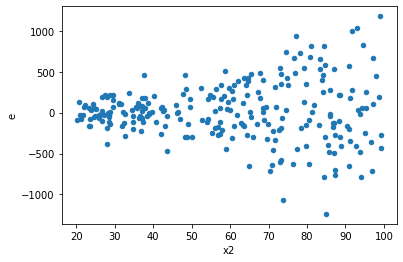

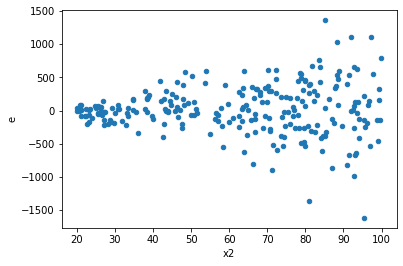

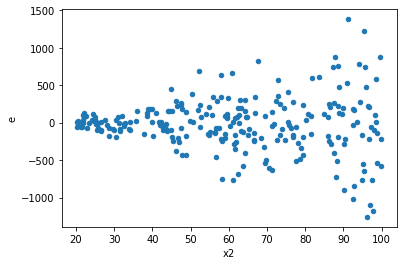

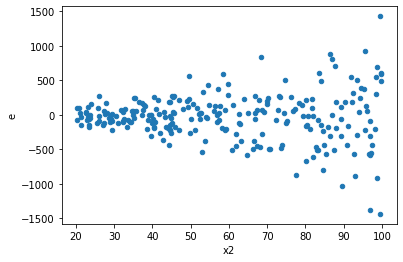

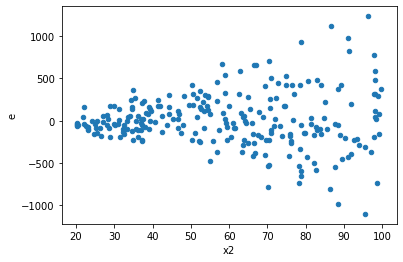

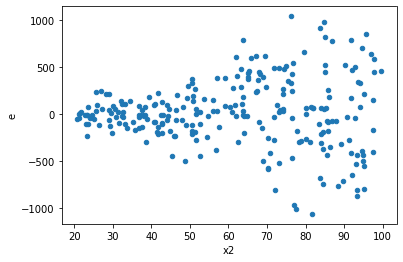

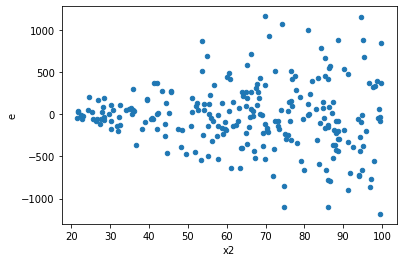

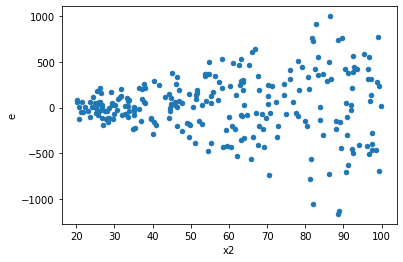

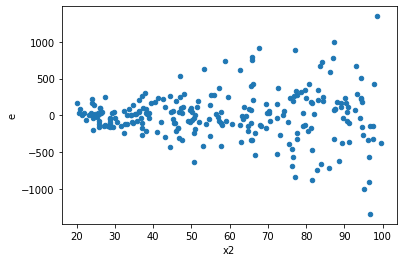

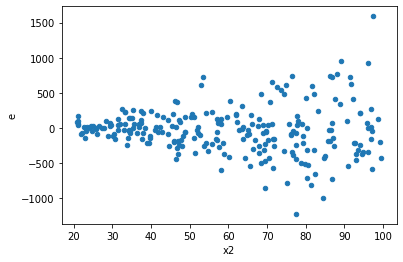

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,129.0,115.0,10484020.68085315,23410552.460290074,81271.47814614845,203570.02139382673,2.5048150475096795,8.513022808909199e-07,0.9999995743488596,4.2565114044545993e-07,Reject001=0 : Heteroscedasticity
3.0,117.0,127.0,6247204.110673314,23542473.85831323,53394.90692883174,185373.80990797817,3.4717507824305534,2.0029311542657524e-11,0.9999999999899853,1.0014655771328762e-11,Reject001=0 : Heteroscedasticity
4.0,105.0,139.0,9263606.617965978,15063400.570783518,88224.82493300931,108369.78827901812,1.2283366769081745,0.2562500597236528,0.8718749701381736,0.1281250298618264,Reject001=1 : Homoscedasticity
7.0,119.0,125.0,3392344.7444958277,23468397.10411682,28507.09869324225,187747.17683293455,6.58597982394613,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,139.0,105.0,8462885.076208657,17528235.848954394,60884.06529646515,166935.57951385138,2.741859938244686,1.357079446595577e-07,0.9999999321460277,6.785397232977886e-08,Reject001=0 : Heteroscedasticity
10.0,132.0,112.0,13559188.857664801,14540291.203457402,102721.12770958182,129824.02860229823,1.263849331652034,0.20206083618835669,0.8989695819058217,0.10103041809417834,Reject001=1 : Homoscedasticity
12.0,118.0,126.0,3835430.5535445157,20913601.483089868,32503.64875885183,165980.9641515069,5.106533281322908,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
15.0,113.0,131.0,12905974.15491928,23184276.356119595,114212.16066300248,176979.20882534044,1.549565368503448,0.01573072649474505,0.9921346367526275,0.007865363247372525,Reject001=1 : Homoscedasticity
20.0,140.0,104.0,11215362.069637146,15810295.413824208,80109.72906883675,152022.07128677124,1.8976730174201637,0.0006688721678036469,0.9996655639160982,0.00033443608390182344,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,119.0,125.0,17855876.132907975,12203148.149349358,150049.37926813425,97625.18519479486,0.650620386908374,0.018590348191759885,Reject001=1 : Homoscedasticity
1.0,129.0,115.0,10484020.68085315,23410552.460290074,81271.47814614845,203570.02139382673,2.5048150475096795,8.513022808909199e-07,Reject001=0 : Heteroscedasticity
2.0,132.0,112.0,17912710.16223698,12951210.737431996,135702.3497139165,115635.81015564282,0.8521282822251983,0.3759552561529647,Reject001=1 : Homoscedasticity
3.0,117.0,127.0,6247204.110673314,23542473.85831323,53394.90692883174,185373.80990797817,3.4717507824305534,2.0029311542657524e-11,Reject001=0 : Heteroscedasticity
4.0,105.0,139.0,9263606.617965978,15063400.570783518,88224.82493300931,108369.78827901812,1.2283366769081745,0.2562500597236528,Reject001=1 : Homoscedasticity
5.0,125.0,119.0,16561833.479847308,14124297.553676182,132494.66783877846,118691.57608131245,0.8958215301595244,0.5433518331562561,Reject001=1 : Homoscedasticity
6.0,131.0,113.0,20595289.719889577,16978180.061850652,157215.95206022577,150249.38107832437,0.9556878873256279,0.7997168958815928,Reject001=1 : Homoscedasticity
7.0,119.0,125.0,3392344.7444958277,23468397.10411682,28507.09869324225,187747.17683293455,6.58597982394613,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,139.0,105.0,8462885.076208657,17528235.848954394,60884.06529646515,166935.57951385138,2.741859938244686,1.357079446595577e-07,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    662
Reject001=1 : Homoscedasticity      338
Name: Result_test, dtype: int64